In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження даних (запуск з notebooks/)
DATA_PATH = "../data/raw/creditcard.csv"
df = pd.read_csv(DATA_PATH)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Перевірка типів даних та пропусків
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Перевірка повних дублікатів
dup_full = df.duplicated().sum()
print(f"Повні дублікати: {dup_full}")

Повні дублікати: 1081


In [ ]:
df = df.drop_duplicates()

In [6]:
# Масштабування Amount за допомогою RobustScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df["Amount_scaled"] = scaler.fit_transform(df[["Amount"]])

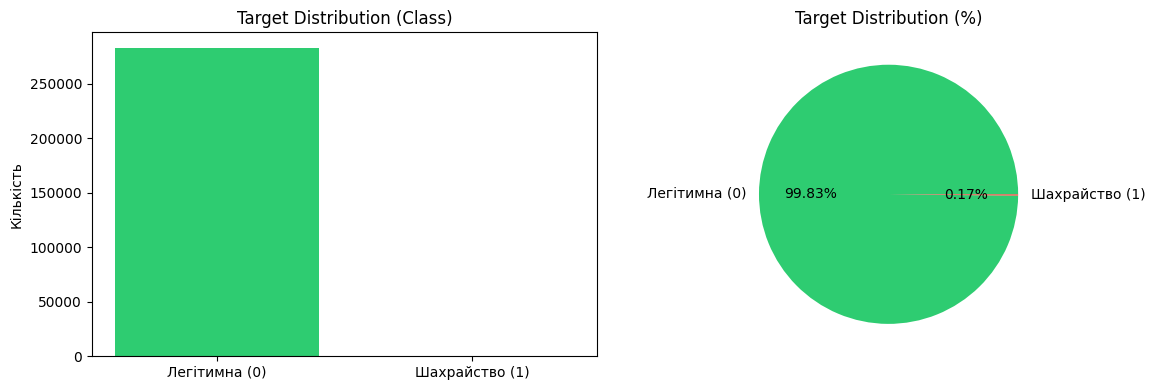

In [7]:
# Візуалізація розподілу цільової змінної (Class: 0 — легітимна, 1 — шахрайство)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
class_counts = df["Class"].value_counts().sort_index()
axes[0].bar(class_counts.index, class_counts.values, color=["#2ecc71", "#e74c3c"])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Легітимна (0)", "Шахрайство (1)"])
axes[0].set_ylabel("Кількість")
axes[0].set_title("Target Distribution (Class)")

# Pie chart
axes[1].pie(
    class_counts.values,
    labels=["Легітимна (0)", "Шахрайство (1)"],
    autopct="%1.2f%%",
    colors=["#2ecc71", "#e74c3c"],
)
axes[1].set_title("Target Distribution (%)")

plt.tight_layout()
plt.show()

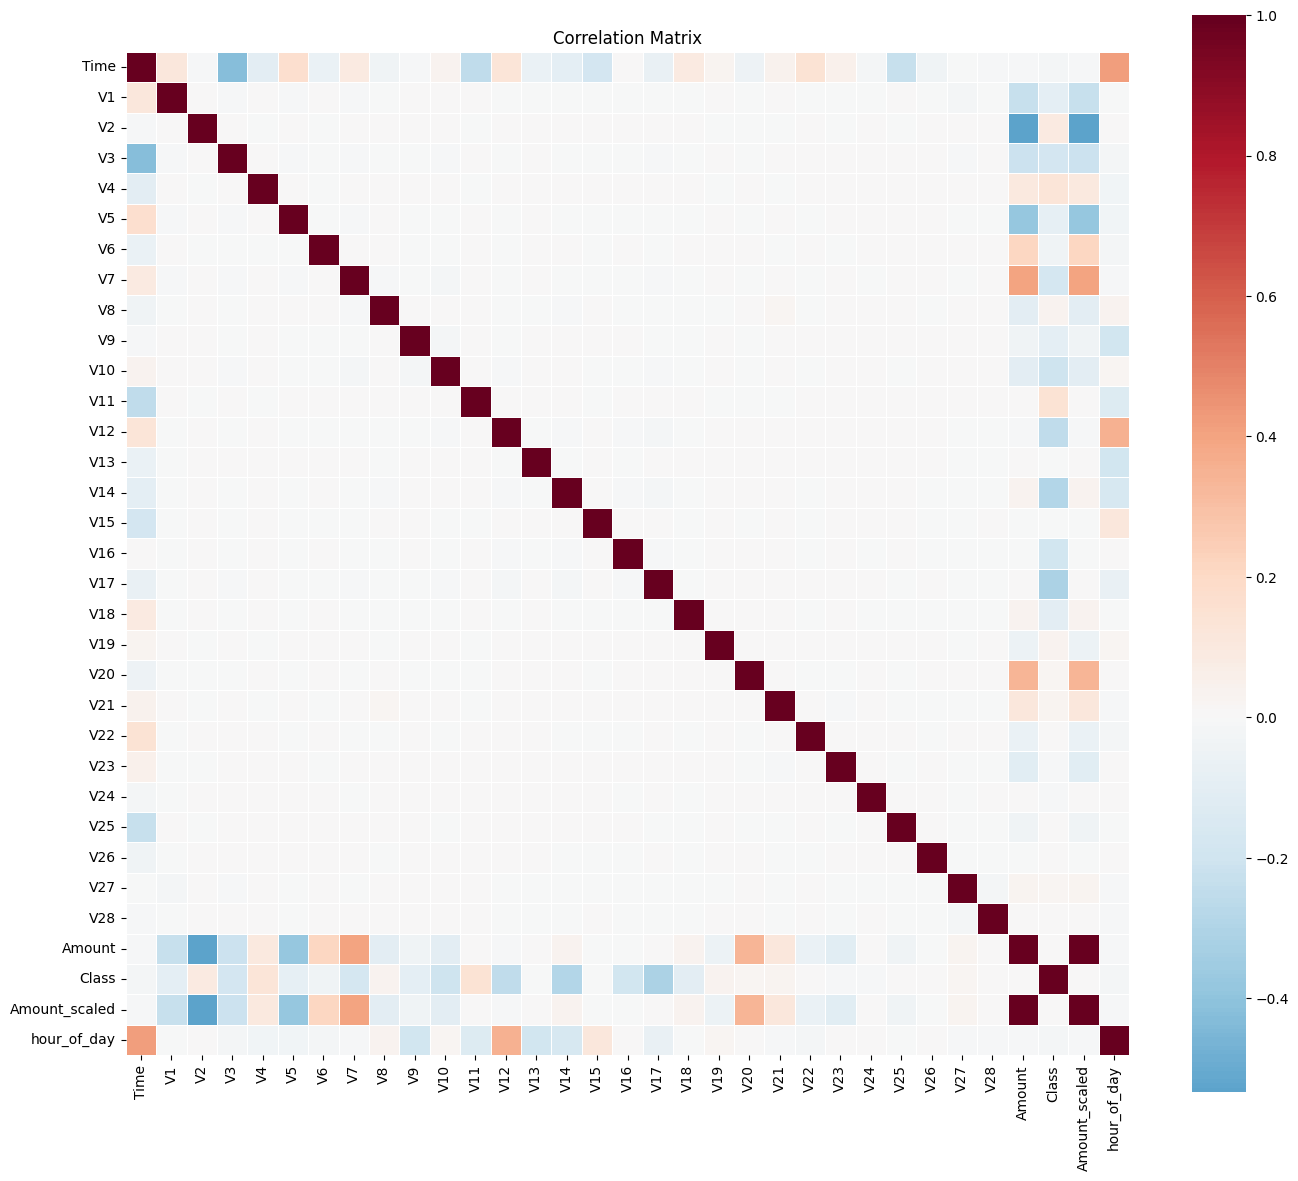

In [8]:
# Матриця кореляції (додаємо hour_of_day)
df["hour_of_day"] = ((df["Time"] // 3600) % 24).astype(int)
plt.figure(figsize=(14, 12))
corr = df.corr()
sns.heatmap(corr, cmap="RdBu_r", center=0, square=True, linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

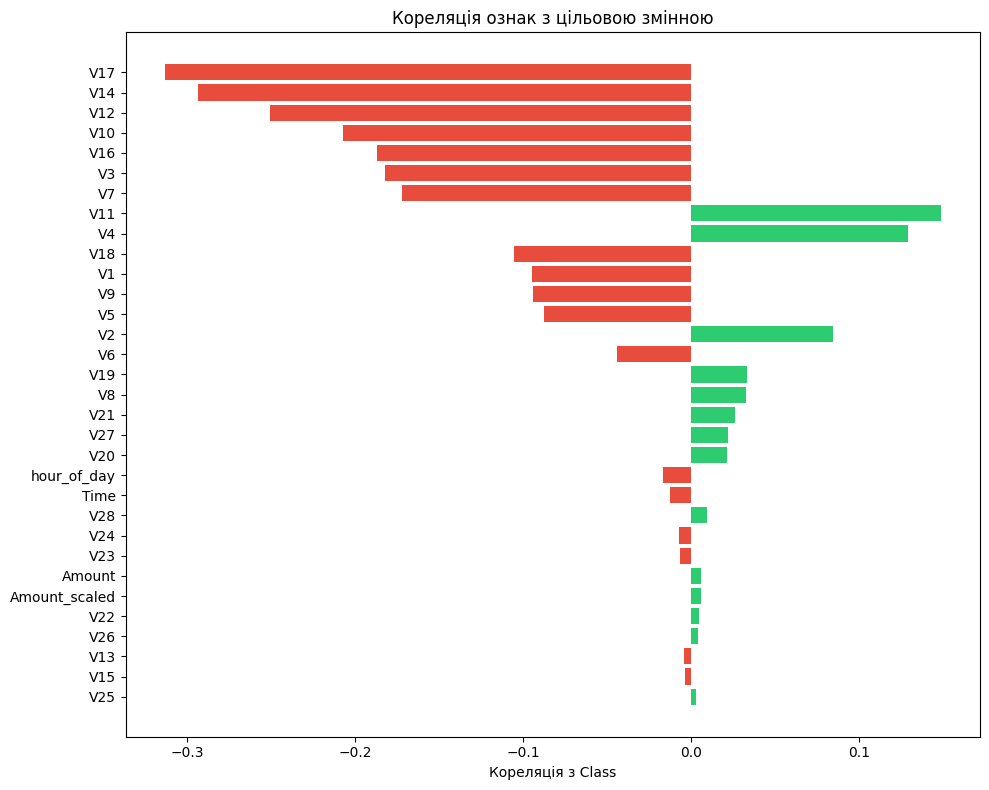

In [9]:
# Кореляція ознак з цільовою змінною (Class)
corr_to_class = (
    df.corr()["Class"].drop("Class").sort_values(key=lambda x: x.abs(), ascending=True)
)
plt.figure(figsize=(10, 8))
colors = ["#e74c3c" if x < 0 else "#2ecc71" for x in corr_to_class.values]
plt.barh(corr_to_class.index, corr_to_class.values, color=colors)
plt.xlabel("Кореляція з Class")
plt.title("Кореляція ознак з цільовою змінною")
plt.tight_layout()
plt.show()

=== Amount — загальна статистика ===
min           0.000000
Q1            5.600000
median       22.000000
Q3           77.510000
90%         203.380000
95%         365.337500
99%        1018.965000
max       25691.160000
mean         88.472687
Name: Amount, dtype: float64

=== Amount — по Class ===


,min,max,mean,median
Легітимна (0),0.0,25691.16,88.41,22.00
Шахрайство (1),0.0,2125.87,123.87,9.82


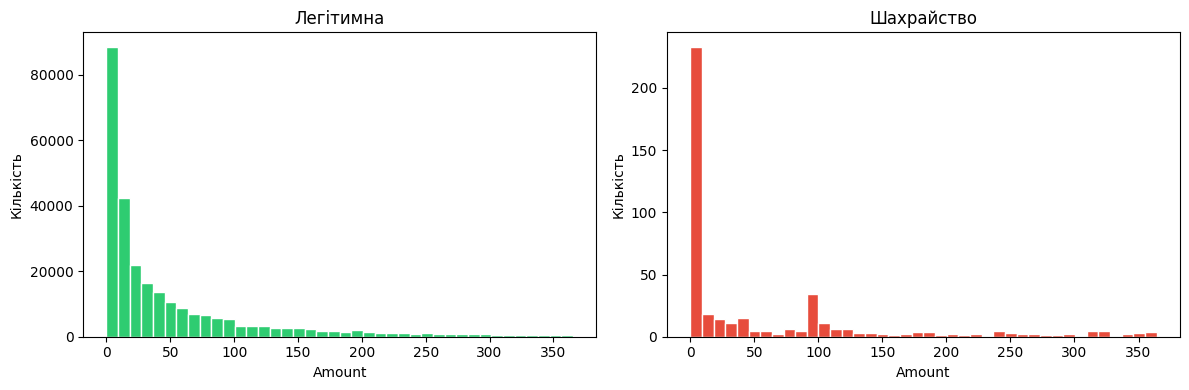

In [10]:
# Статистика по Amount (загальна та по Class)
print("=== Amount — загальна статистика ===")
desc = df["Amount"].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print(
    desc[["min", "25%", "50%", "75%", "90%", "95%", "99%", "max", "mean"]].rename(
        {"25%": "Q1", "50%": "median", "75%": "Q3"}
    )
)

print("\n=== Amount — по Class ===")
stats_by_class = (
    df.groupby("Class")["Amount"].agg(["min", "max", "mean", "median"]).round(2)
)
stats_by_class.index = ["Легітимна (0)", "Шахрайство (1)"]
display(stats_by_class)

# Розподіл Amount окремо (шахрайство 0.17% — на спільному графіку не видно)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
cap = df["Amount"].quantile(0.95)
for ax, (cl, label) in zip(axes, [(0, "Легітимна"), (1, "Шахрайство")]):
    subset = df[(df["Class"] == cl) & (df["Amount"] <= cap)]
    ax.hist(
        subset["Amount"],
        bins=40,
        edgecolor="white",
        color="#2ecc71" if cl == 0 else "#e74c3c",
    )
    ax.set_xlabel("Amount")
    ax.set_ylabel("Кількість")
    ax.set_title(label)
plt.tight_layout()
plt.show()

In [11]:
# % шахрайства по годинах доби
fraud_by_hour = (
    df.groupby("hour_of_day")
    .agg(
        total=("Class", "count"),
        fraud=("Class", "sum"),
    )
    .assign(fraud_pct=lambda x: (x["fraud"] / x["total"] * 100).round(2))
)

print("=== % шахрайства по годинах доби (0–23) ===")
display(fraud_by_hour)

=== % шахрайства по годинах доби (0–23) ===


,total,fraud,fraud_pct
hour_of_day,,,
0,7647,6,0.08
1,4208,10,0.24
2,3308,48,1.45
3,3487,17,0.49
4,2204,23,1.04
5,2988,11,0.37
6,4082,9,0.22
7,7233,23,0.32
8,10232,9,0.09


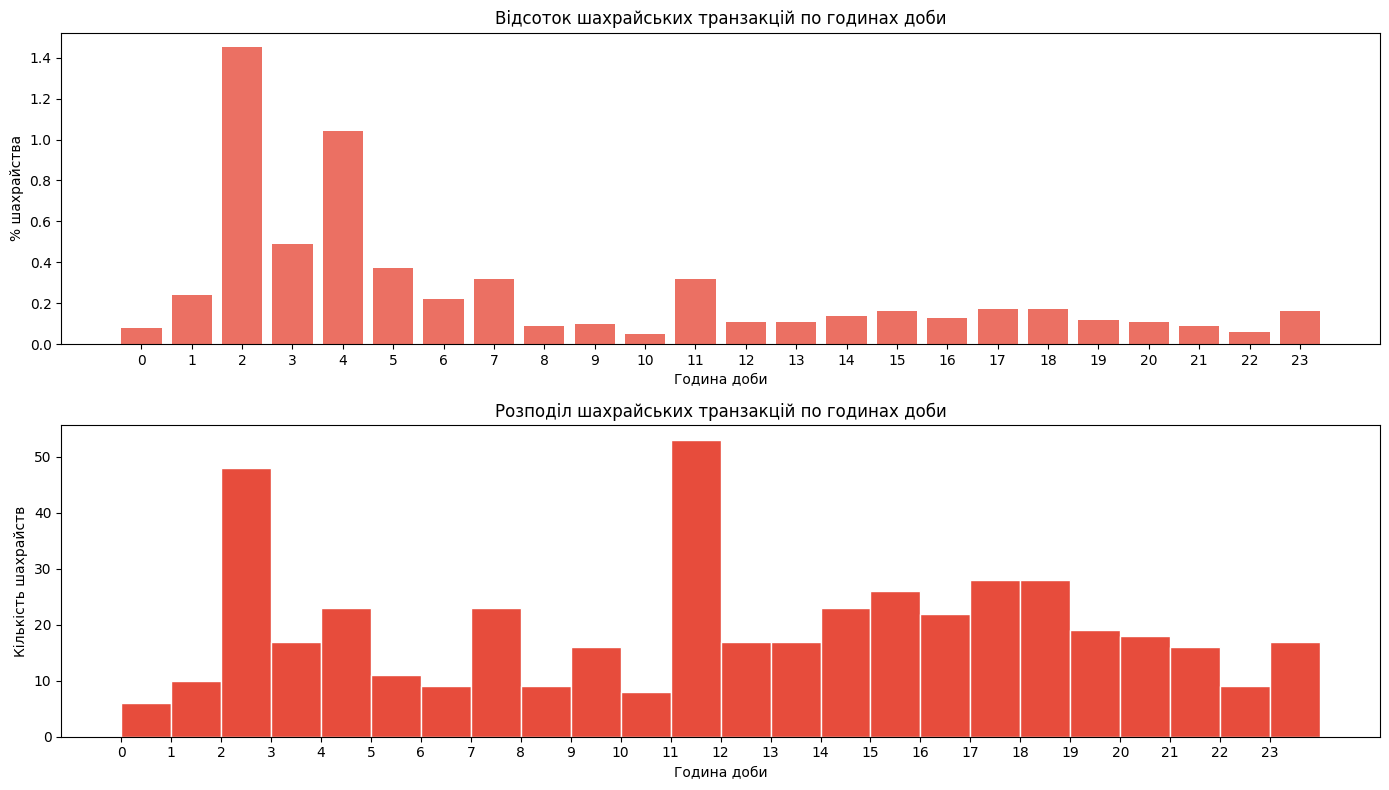

In [12]:
# Візуалізація: % шахрайства по годинах та розподіл часу шахрайських транзакцій
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Графік % шахрайства по годинах
axes[0].bar(fraud_by_hour.index, fraud_by_hour["fraud_pct"], color="#e74c3c", alpha=0.8)
axes[0].set_xlabel("Година доби")
axes[0].set_ylabel("% шахрайства")
axes[0].set_title("Відсоток шахрайських транзакцій по годинах доби")
axes[0].set_xticks(range(24))

# Гістограма розподілу шахрайських транзакцій по годинах
fraud_df = df[df["Class"] == 1]
axes[1].hist(
    fraud_df["hour_of_day"], bins=24, range=(0, 24), color="#e74c3c", edgecolor="white"
)
axes[1].set_xlabel("Година доби")
axes[1].set_ylabel("Кількість шахрайств")
axes[1].set_title("Розподіл шахрайських транзакцій по годинах доби")
axes[1].set_xticks(range(24))

plt.tight_layout()
plt.show()

In [13]:
# Підсумок: день vs ніч, найнебезпечніші години
df["period"] = df["hour_of_day"].apply(
    lambda h: "день (6–22)" if 6 <= h < 22 else "ніч (22–6)"
)

period_stats = df.groupby("period").agg(
    total=("Class", "count"), fraud=("Class", "sum")
)
period_stats["fraud_pct"] = (period_stats["fraud"] / period_stats["total"] * 100).round(
    2
)
print("=== % шахрайства: день vs ніч ===")
display(period_stats)

=== % шахрайства: день vs ніч ===


,total,fraud,fraud_pct
period,,,
день (6–22),233623,332,0.14
ніч (22–6),50103,141,0.28


In [14]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Amount_scaled', 'hour_of_day', 'period'],
      dtype='object')

In [15]:
# XGBoost — базове навчання для feature importance
from sklearn.model_selection import train_test_split
import xgboost as xgb

exclude = ["Time", "Amount", "period", "Class"]
feature_cols = [c for c in df.columns if c not in exclude]
X = df[feature_cols]
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

ratio = float(np.sum(y == 0)) / np.sum(y == 1)

model = xgb.XGBClassifier(random_state=42, eval_metric="aucpr", scale_pos_weight=ratio)

model.fit(X_train, y_train)

# Feature importance
importance = pd.DataFrame(
    {"feature": feature_cols, "importance": model.feature_importances_}
)
importance = importance.sort_values("importance", ascending=False)
print("=== Feature Importance ===")
display(importance)

=== Feature Importance ===


,feature,importance
13,V14,0.614565
3,V4,0.055737
11,V12,0.025385
2,V3,0.024245
9,V10,0.023816
7,V8,0.023664
18,V19,0.019769
25,V26,0.015923
10,V11,0.014865
20,V21,0.014444


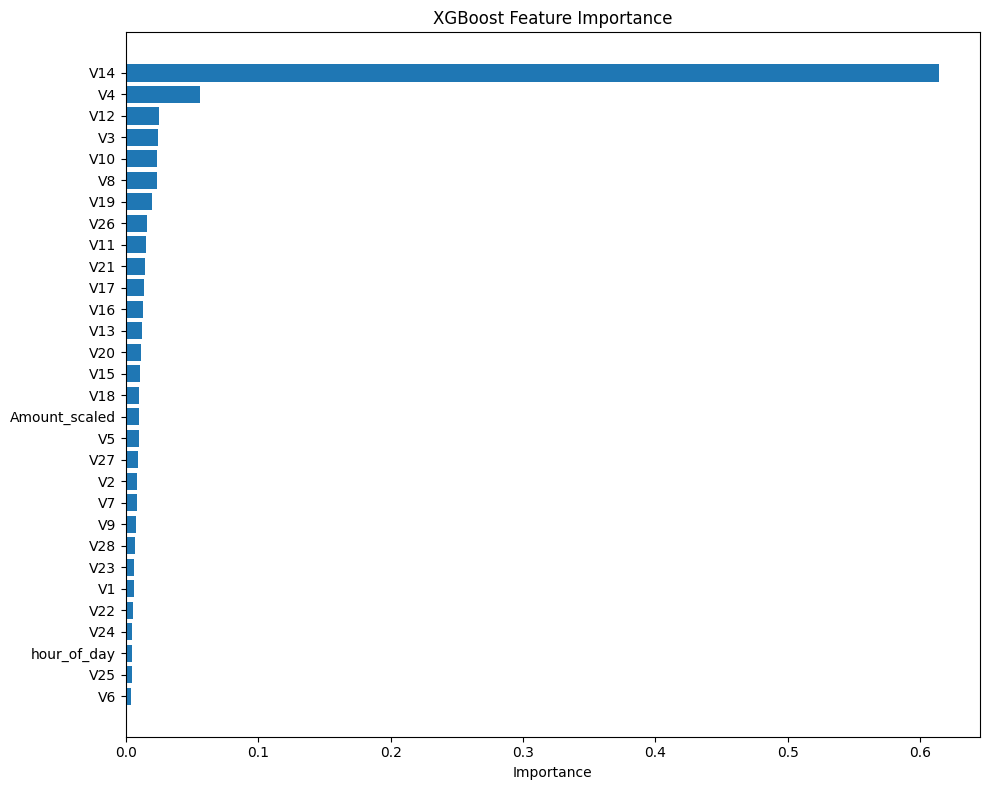

In [16]:
plt.figure(figsize=(10, 8))
plt.barh(importance["feature"][::-1], importance["importance"][::-1])
plt.xlabel("Importance")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

In [17]:
# Отримуємо важливість за типом "weight" (кількість разів, коли фіча зустрічається в деревах)
bst = model.get_booster()
importance_weight = bst.get_score(importance_type="weight")

# Перетворення в DataFrame для зручності
imp_df = pd.DataFrame(list(importance_weight.items()), columns=["feature", "weight"])
imp_df = imp_df.sort_values("weight", ascending=False)
display(imp_df)

,feature,weight
13,V14,144.0
3,V4,139.0
11,V12,122.0
25,V26,114.0
21,V22,104.0
10,V11,100.0
28,Amount_scaled,98.0
18,V19,94.0
9,V10,94.0
7,V8,93.0


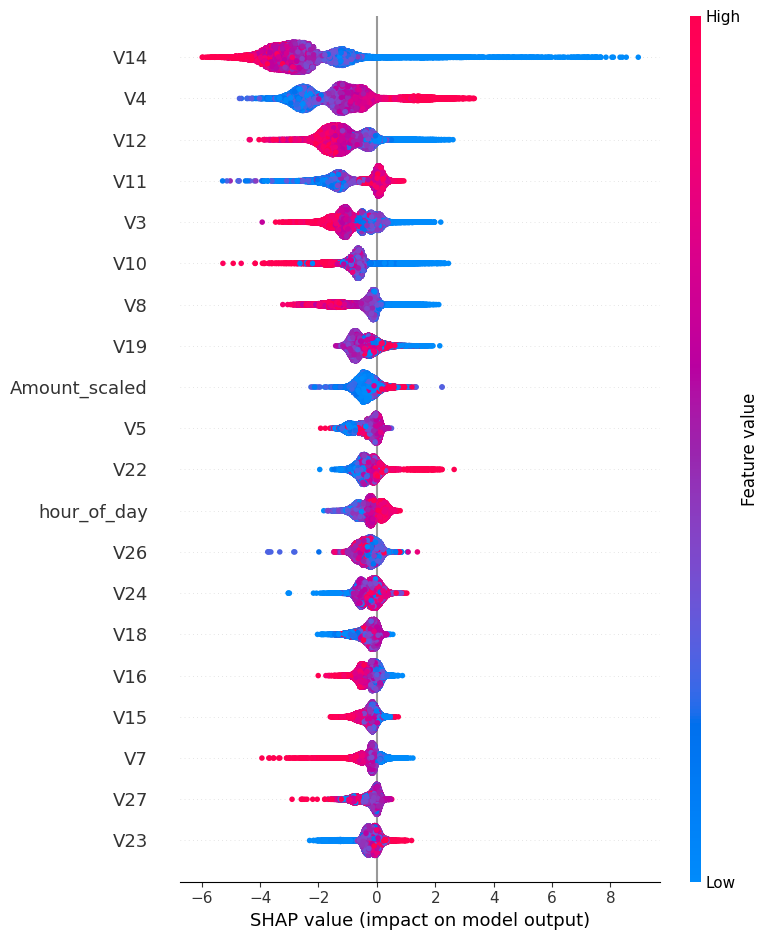

In [18]:
import shap

# Ініціалізація JS (якщо в Jupyter)
shap.initjs()

# Створення explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Візуалізація (Summary Plot) - це найкращий графік для аналізу
shap.summary_plot(shap_values, X_test)